<a href="https://colab.research.google.com/github/Saravanakumar0077/ECOMMERCE_SALES_ANALYSIS/blob/main/E_COMMERCE_SALES_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('/content/ecommerce_sales_analysis.csv')
print(data.info())
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   int64  
 1   product_name    1000 non-null   object 
 2   category        1000 non-null   object 
 3   price           1000 non-null   float64
 4   review_score    1000 non-null   float64
 5   review_count    1000 non-null   int64  
 6   sales_month_1   1000 non-null   int64  
 7   sales_month_2   1000 non-null   int64  
 8   sales_month_3   1000 non-null   int64  
 9   sales_month_4   1000 non-null   int64  
 10  sales_month_5   1000 non-null   int64  
 11  sales_month_6   1000 non-null   int64  
 12  sales_month_7   1000 non-null   int64  
 13  sales_month_8   1000 non-null   int64  
 14  sales_month_9   1000 non-null   int64  
 15  sales_month_10  1000 non-null   int64  
 16  sales_month_11  1000 non-null   int64  
 17  sales_month_12  1000 non-null   in

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257


In [2]:
# Calculate total sales per product over 12 months
monthly_sales_columns = [f'sales_month_{i}' for i in range(1, 13)]
data['total_sales'] = data[monthly_sales_columns].sum(axis=1)

# Calculate monthly total sales for all products
monthly_sales_totals = data[monthly_sales_columns].sum()
print("Total Sales by Month:")
print(monthly_sales_totals)


Total Sales by Month:
sales_month_1     498306
sales_month_2     507661
sales_month_3     506739
sales_month_4     503823
sales_month_5     487194
sales_month_6     491653
sales_month_7     507011
sales_month_8     504569
sales_month_9     491934
sales_month_10    514798
sales_month_11    505838
sales_month_12    500386
dtype: int64


In [3]:
# Top 10 products by total sales
top_products = data[['product_name', 'category', 'total_sales']].sort_values(by='total_sales', ascending=False).head(10)
print("Top 10 Products by Total Sales:")
print(top_products)



Top 10 Products by Total Sales:
    product_name     category  total_sales
223  Product_224  Electronics         9151
285  Product_286     Clothing         8921
733  Product_734       Health         8914
904  Product_905       Sports         8783
179  Product_180       Sports         8775
852  Product_853        Books         8765
238  Product_239       Health         8724
923  Product_924  Electronics         8525
936  Product_937  Electronics         8459
196  Product_197         Toys         8418


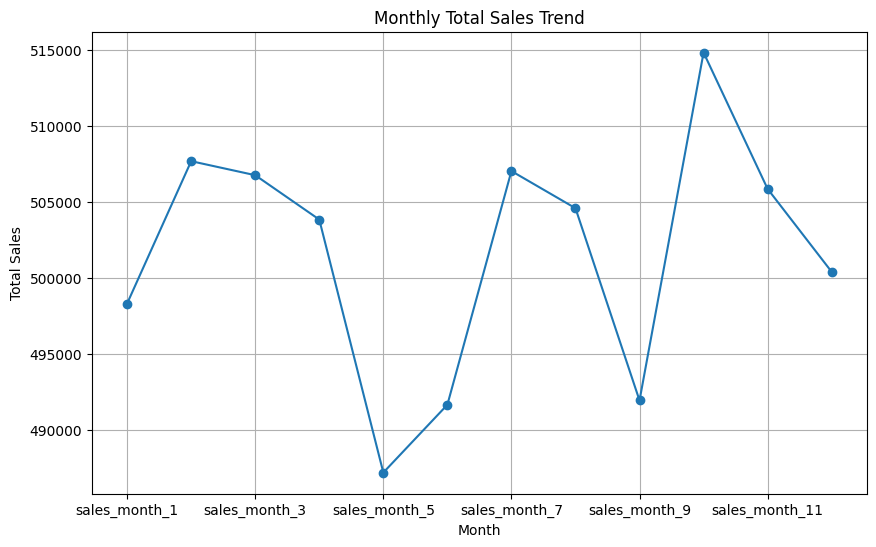

In [4]:
# Plot monthly total sales trend
plt.figure(figsize=(10, 6))
monthly_sales_totals.plot(kind='line', marker='o')
plt.title("Monthly Total Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()


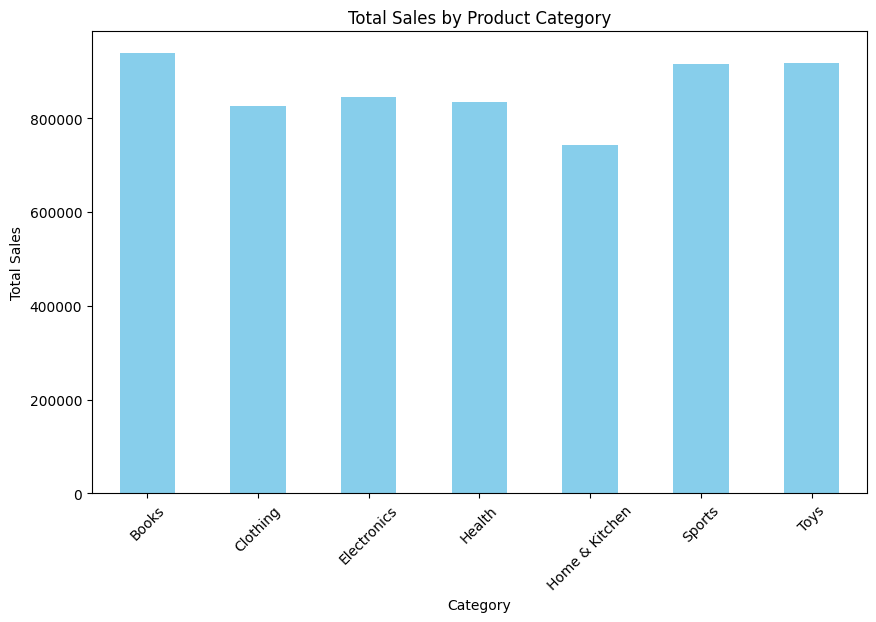

In [5]:
# Total sales by category
category_sales = data.groupby('category')['total_sales'].sum()

# Plot sales by category
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='skyblue')
plt.title("Total Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


In [6]:
# Average review score and count by category
review_summary = data.groupby('category')[['review_score', 'review_count']].mean()

# Display the summary
print("Average Review Score and Count by Category:")
print(review_summary)


Average Review Score and Count by Category:
                review_score  review_count
category                                  
Books               3.096753    514.694805
Clothing            2.952143    502.478571
Electronics         3.143478    535.231884
Health              3.005036    520.848921
Home & Kitchen      3.035200    541.880000
Sports              3.091503    547.228758
Toys                2.870861    524.337748


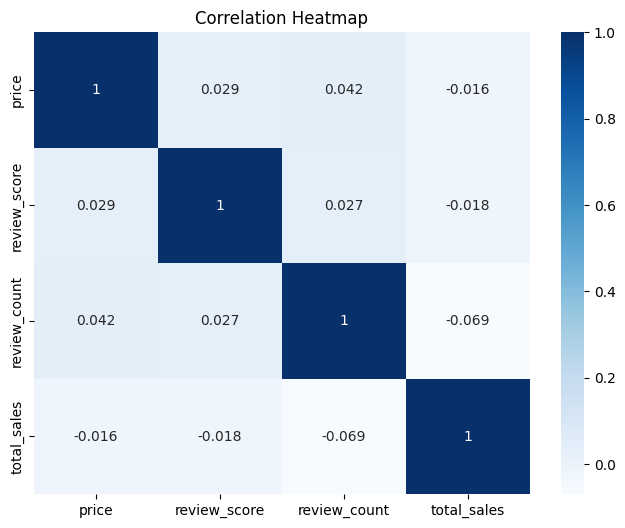

In [7]:


# Select relevant columns for correlation
correlation_data = data[['price', 'review_score', 'review_count', 'total_sales']]

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data.corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()


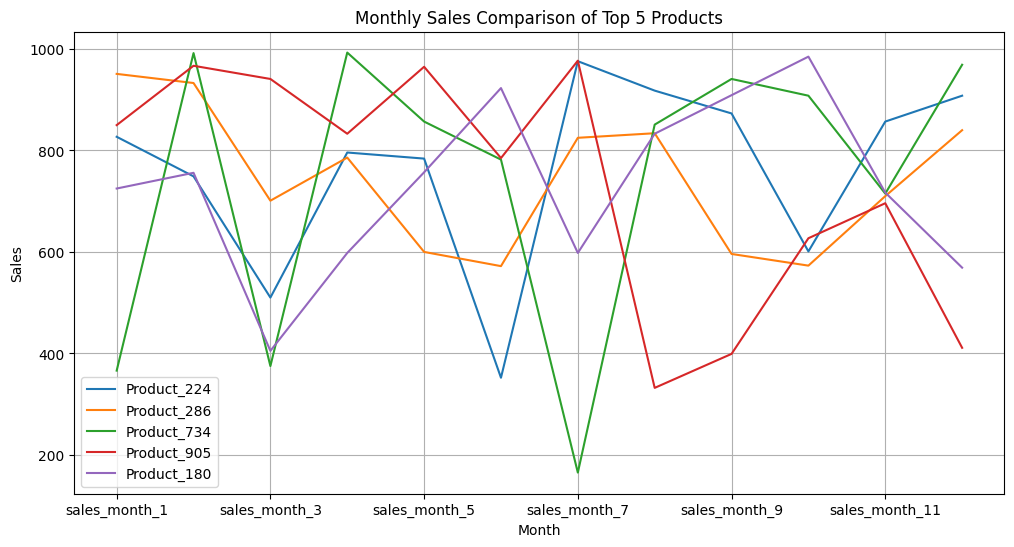

In [8]:
# Top 5 products by total sales
top_5_products = data.nlargest(5, 'total_sales')['product_name']

# Plot monthly sales trends for top products
plt.figure(figsize=(12, 6))
for product in top_5_products:
    product_data = data[data['product_name'] == product][monthly_sales_columns].sum()
    product_data.plot(label=product)

plt.title("Monthly Sales Comparison of Top 5 Products")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid()
plt.show()


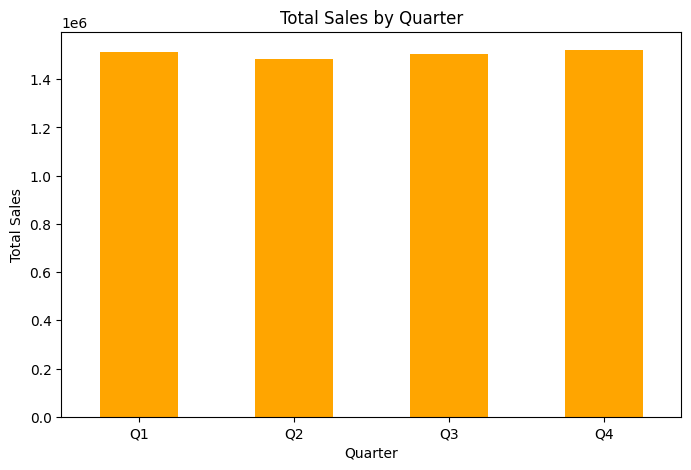

In [9]:
# Create a quarter-based sales DataFrame
quarters = {
    'Q1': data[['sales_month_1', 'sales_month_2', 'sales_month_3']].sum(axis=1),
    'Q2': data[['sales_month_4', 'sales_month_5', 'sales_month_6']].sum(axis=1),
    'Q3': data[['sales_month_7', 'sales_month_8', 'sales_month_9']].sum(axis=1),
    'Q4': data[['sales_month_10', 'sales_month_11', 'sales_month_12']].sum(axis=1)
}
quarter_sales = pd.DataFrame(quarters)

# Plot total sales by quarter
quarter_sales_totals = quarter_sales.sum()
quarter_sales_totals.plot(kind='bar', color='orange', figsize=(8, 5))
plt.title("Total Sales by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.show()


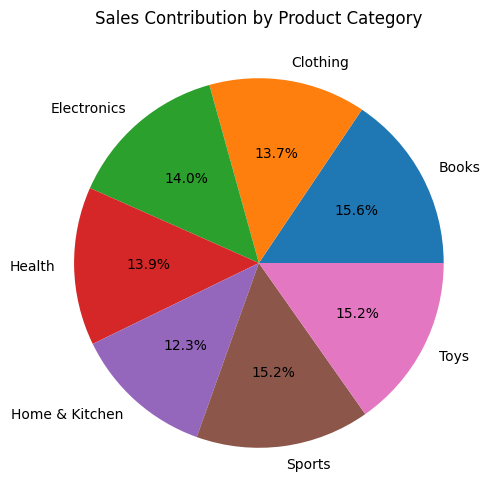

In [10]:
# Total sales by category
category_sales = data.groupby('category')['total_sales'].sum()

# Plot sales contribution by category
plt.figure(figsize=(10, 6))
category_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title("Sales Contribution by Product Category")
plt.ylabel("")
plt.show()


In [11]:
# Calculate average monthly sales per product
data['average_monthly_sales'] = data[monthly_sales_columns].mean(axis=1)

# Top 10 products by average monthly sales
top_avg_sales_products = data[['product_name', 'average_monthly_sales']].sort_values(by='average_monthly_sales', ascending=False).head(10)
print("Top 10 Products by Average Monthly Sales:")
print(top_avg_sales_products)


Top 10 Products by Average Monthly Sales:
    product_name  average_monthly_sales
223  Product_224             762.583333
285  Product_286             743.416667
733  Product_734             742.833333
904  Product_905             731.916667
179  Product_180             731.250000
852  Product_853             730.416667
238  Product_239             727.000000
923  Product_924             710.416667
936  Product_937             704.916667
196  Product_197             701.500000


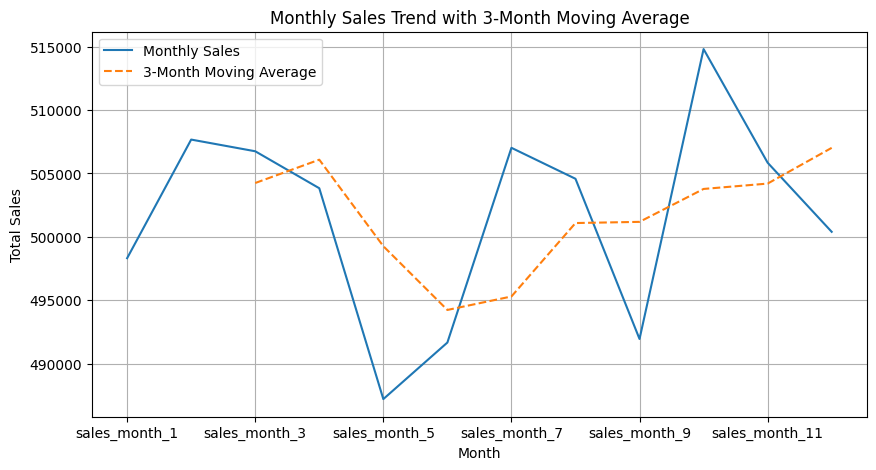

In [12]:
# Compute rolling average sales for the total monthly sales
rolling_sales = monthly_sales_totals.rolling(window=3).mean()

# Plot moving average sales trend
plt.figure(figsize=(10, 5))
monthly_sales_totals.plot(label='Monthly Sales')
rolling_sales.plot(label='3-Month Moving Average', linestyle='--')
plt.title("Monthly Sales Trend with 3-Month Moving Average")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.legend()
plt.grid()
plt.show()


Top 10 Products by Review Score:
    product_name  review_score
715  Product_716           5.0
348  Product_349           5.0
616  Product_617           5.0
591  Product_592           5.0
584  Product_585           5.0
664  Product_665           5.0
74    Product_75           5.0
88    Product_89           5.0
104  Product_105           5.0
954  Product_955           5.0


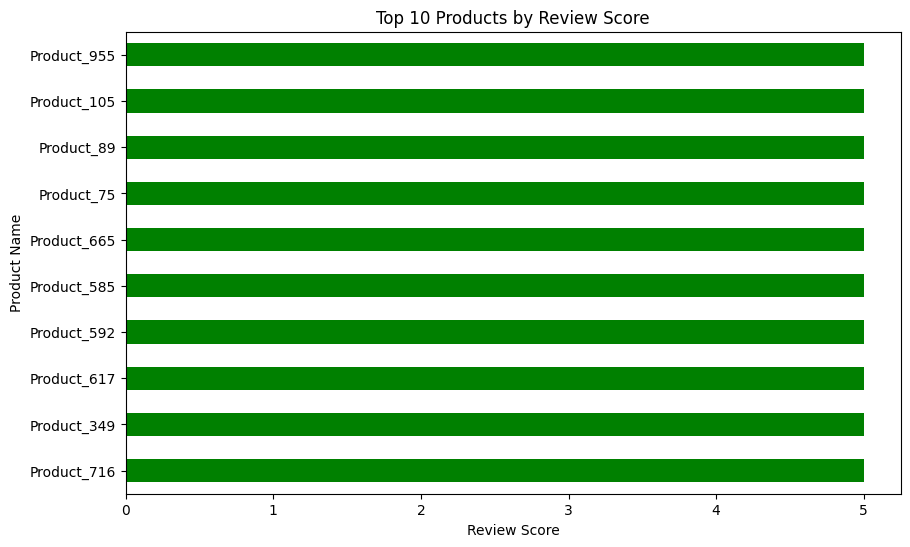

In [13]:
# Top products by average review score
top_reviewed_products = data[['product_name', 'review_score']].sort_values(by='review_score', ascending=False).head(10)
print("Top 10 Products by Review Score:")
print(top_reviewed_products)

# Plot review scores for visualization
plt.figure(figsize=(10, 6))
top_reviewed_products.set_index('product_name')['review_score'].plot(kind='barh', color='green')
plt.title("Top 10 Products by Review Score")
plt.xlabel("Review Score")
plt.ylabel("Product Name")
plt.show()


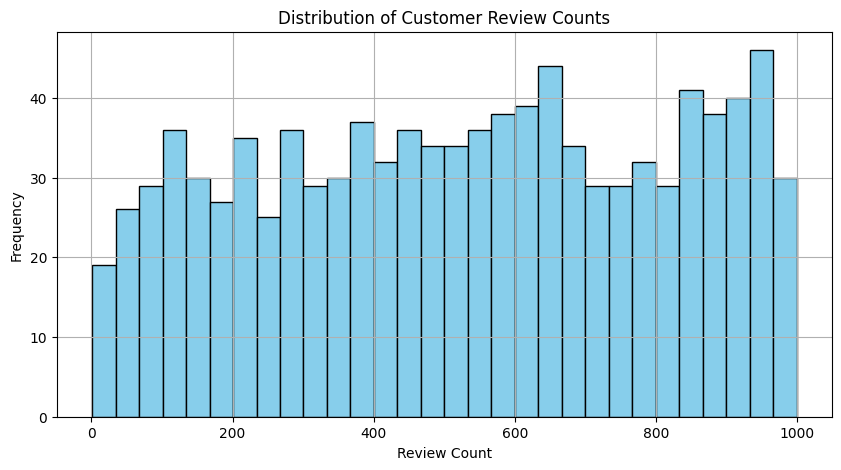

In [14]:
# Distribution of review counts
plt.figure(figsize=(10, 5))
data['review_count'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Customer Review Counts")
plt.xlabel("Review Count")
plt.ylabel("Frequency")
plt.grid()
plt.show()


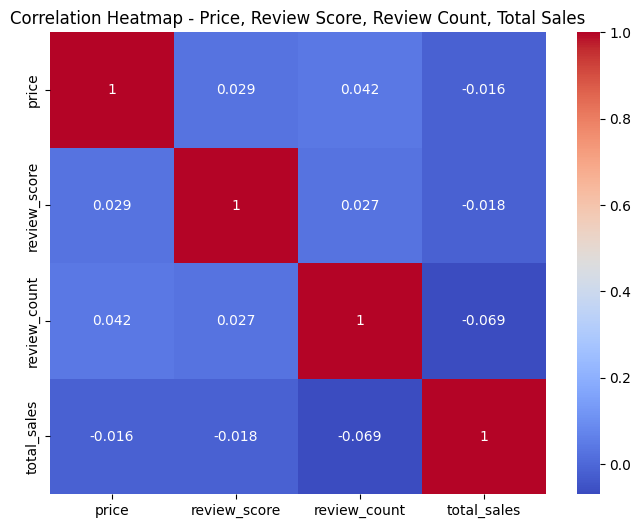

In [15]:
# Correlation heatmap
correlation_data = data[['price', 'review_score', 'review_count', 'total_sales']]
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Price, Review Score, Review Count, Total Sales")
plt.show()


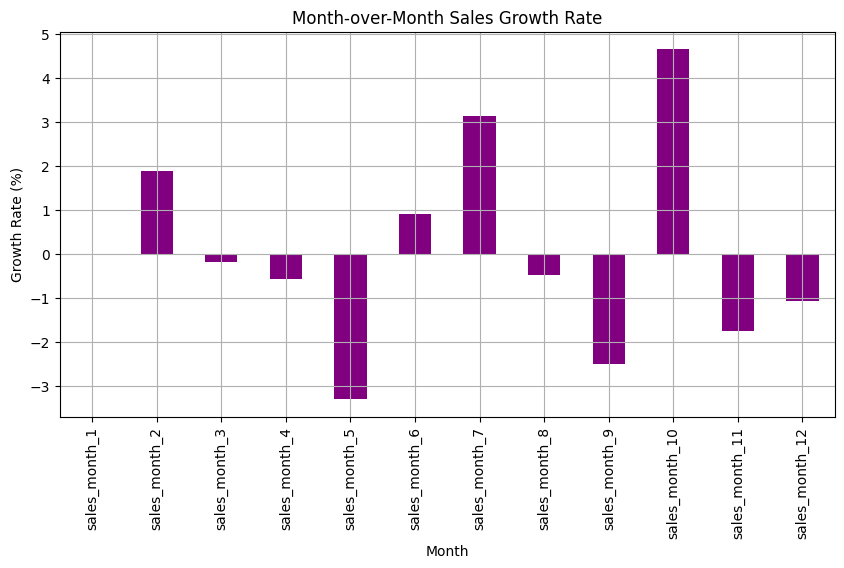

In [16]:
# Calculate growth rate as percentage change between months
growth_rate = monthly_sales_totals.pct_change() * 100

# Plot growth rate
plt.figure(figsize=(10, 5))
growth_rate.plot(kind='bar', color='purple')
plt.title("Month-over-Month Sales Growth Rate")
plt.xlabel("Month")
plt.ylabel("Growth Rate (%)")
plt.grid()
plt.show()


In [17]:
# Calculate standard deviation of monthly sales to measure stability
data['sales_stability'] = data[monthly_sales_columns].std(axis=1)

# Top 10 most stable products
most_stable_products = data[['product_name', 'sales_stability']].sort_values(by='sales_stability').head(10)
print("Top 10 Most Stable Products by Sales Consistency:")
print(most_stable_products)


Top 10 Most Stable Products by Sales Consistency:
    product_name  sales_stability
213  Product_214       121.537374
285  Product_286       137.733906
746  Product_747       146.678064
238  Product_239       152.244421
816  Product_817       152.913424
182  Product_183       155.778106
796  Product_797       158.636138
481  Product_482       160.385024
179  Product_180       168.657331
37    Product_38       169.371633
